In [14]:
# libaries used in Simulation
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt 
import pandas as pd
import math
from statistics import mode
from random import sample
# Global Parameters
n_pop=1000 # change 
inc_period=4# activation period
inf_period=14# active period
qt_dia_period=4# time it takes for patients to get diagnosed with infection
qt_period=10# controlled active period
n_neib=3 # change
sd=0
n_v1=0
n_v2=0
n_vc1=0
n_vc2=0
n_nv=n_pop
n_exp_nv=0
n_exp_v1=0
exp=[]
inf=[inf_period]
qt=[]
inf_prob=0.18 #change
v1_inf_prob=0.00001# change
rec_prob=0.97 # change
rec=0
des=0


In [15]:
# Function to implement Social Distancing and mask mandate
def social_distancing():
    global inf_prob,v1_inf_prob
    inf_prob=0.01
    v1_inf_prob=0.000001

def mutant_virus():
    global inf_prob,v1_inf_prob
    inf_prob=0.3
    v1_inf_prob=0.0001
    
# Function to vaccinate dose 1   
def vaccine_d1(n1=int(0.01*n_pop)):#change
    global n_nv,n_v1,n_vc1
    if(n1<=n_nv):
        n_vc1=n_vc1+n1
        n_v1+=n1
        n_nv-=n1
        
# Function to vaccinate dose 1   
def vaccine_d2(n2=int(0.005*n_pop)):#change
    global n_v1,n_v2
    if(n2<=n_v1):
        n_v2+=n2
        n_v1-=n2
        
# Function to expose the supspectable vacinated population and supspectable non-vacinated population
def get_exposed():
    global inf,n_nv,inf_prob,n_neib,n_v1,v1_inf_prob,n_exp_nv,n_exp_v1,n_exp_nv
    if(n_nv>0.1*n_pop):
        n_inf=len(inf)
        n_exp_nv=sum(np.random.binomial(n_neib,inf_prob,n_inf))#     
#         print("\n Number of non-vacinated exposed today = {} ".format(n_exp_nv))
        if(n_v1>1):
            n_exp_v1=sum(np.random.binomial(n_neib,v1_inf_prob,n_inf))  
#         print("\n number of vacinated exposed today = {}".format(n_exp_v1))
        n_exp=n_exp_nv+n_exp_v1
        if(n_v1>1):
            n_v1-=n_exp_v1
        n_nv-=n_exp_nv
        exp.extend(n_exp*[inf_period+inc_period])
    print("\n  exposed list {}".format(len(exp)))
#     print("\n  exposed list {}".format(exp))
    print("\n initial infected LIST {}".format(inf))

    return len(exp)

# Function to update the exposed days 

def update_days_exp():
    global exp
    exp= list(np.array(exp)-np.array((len(exp)*[1])))
    return exp


# Function to make the exposed population to be infectitous
def get_infected():
    global inf,exp,n_nv
    n_inf=exp.count(inf_period)
    inf.extend(n_inf*[inf_period])
    print("\n Total number of infected people = {}".format(len(inf)))
    print("\n  infected list {}".format(inf))
    exp = np.array(exp)
    exp=list(exp[~np.isin(exp, inf_period)])
#     print("\n  exposed after removal list {}".format(exp))
    return

# Function to update the infected days
def update_days_inf():
    global inf
    inf= list(np.array(inf)-np.array((len(inf)*[1])))
    return inf

def get_quarantined():
    global inf,exp,qt
    n_qt=inf.count(inf_period-qt_dia_period)
    qt.extend(n_qt*[qt_period])

    print("\n The number of quarantined people who were diagnosed with infection = {}".format(len(qt)))
    print("\n  quarantined list {}".format(qt))
    inf = np.array(inf)
    inf=list(inf[~np.isin(inf, qt_period)])
    return qt

# Function to update the quarentained days
def update_days_qt():
    global qt
    qt= list(np.array(qt)-np.array((len(qt)*[1])))
    print("\n updated quarantined list {}".format(qt))
    return qt   

# Function to determine the results of infected people
def result_from_infected():
    global inf,rec,des
    c=inf.count(0)
    if(c>0):
        n_rec=  np.random.binomial(c,rec_prob, 1)[0]
        des=des + (c-n_rec)
        rec=rec+n_rec
        inf = np.array(inf)
        inf=list(inf[~np.isin(inf, 0)])
#     print("\n number of recovered {}".format(rec))
#     print("\n number of deceased {}".format(des))
    return rec

# Function to determine the results of quarantined people    
def result_from_quarantined():
    global qt,rec,des
    c=qt.count(0)
    if(c>0):
        n_rec=  np.random.binomial(c,rec_prob, 1)[0]
        des=des + (c-n_rec)
        rec=rec+n_rec
        qt = np.array(qt)
        qt=list(qt[~np.isin(qt, 0)])
#     print("\n number of recovered {}".format(rec))
#     print("\n number of deceased {}".format(des))
    return rec

# Function to determine the results from people with 2 dose of vaccination    
def result_from_vaccine():
    global n_v2,rec,n_vc2
    n_vc2=n_vc2+n_v2
    rec= rec+n_v2
    n_v2=0
    return rec
    


In [16]:

df=pd.DataFrame({'trial':[],'days':[],'susceptible':[],'exposed':[],'infected':[],'quarantined':[],'deceased':[],'recovered':[]})

## Social Distancing and masking Mandate rules implementation days
sd_start=60
vaccine_rollout=100
flag=0
for trail in range(1):
    for day in range(0,365):#change
        df.loc[len(df.index)] = [1,day, n_nv+n_v1,len(exp),len(inf),len(qt),des,rec] 
        if day >vaccine_rollout: #change       
            vaccine_d1()
#         if day >vaccine_rollout+60:
#             vaccine_d2()
#         if day >40:
#             mutant_virus()
        if day>sd_start:#change
            sd=1
        if sd==1:
            social_distancing()
#             print("\n prob {}".format(inf_prob))
        print("\n Day {}".format(day))
#         print("\n Non-vaccinated {}".format(n_nv))
#         print("\n vaccinated with one dose {}".format(n_vc1))
#         print("\n vaccinated with two dose {}".format(n_vc2))
        if(flag==0):
            if(len(inf)==0):
                if(day>10):
                    infection_stopdate=day
                    flag=1
        get_exposed()
        get_infected()
        get_quarantined()    
        result_from_infected()
        result_from_quarantined()
        result_from_vaccine()
        update_days_exp()
        update_days_inf()
        update_days_qt()
       
#         if len(inf)<1:
# #             print("\n infection numbers{}".format(len(inf)))
#             break


#     print("\n infection ended day{}".format(day))
df["total"]=df['susceptible']+df['exposed']+df['infected']+df['quarantined']+df['deceased']+df['recovered']


 Day 0

  exposed list 0

 initial infected LIST [14]

 Total number of infected people = 1

  infected list [14]

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 1

  exposed list 1

 initial infected LIST [13]

 Total number of infected people = 1

  infected list [13]

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 2

  exposed list 2

 initial infected LIST [12]

 Total number of infected people = 1

  infected list [12]

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 3

  exposed list 2

 initial infected LIST [11]

 Total number of infected people = 1

  infected list [11]

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 4

  exposed list 3

 initial 


  infected list [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12

 Day 113

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 114

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 115

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 116

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 117

  exposed list 0

 initial infecte

 Day 159

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 160

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 161

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 162

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 163

  exposed list 0

 initial infecte


 Day 223

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 224

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 225

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 226

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 227

  exposed list 0

 initial infect

 Day 279

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 280

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 281

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 282

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 283

  exposed list 0

 initial infecte


 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 333

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 334

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 335

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were diagnosed with infection = 0

  quarantined list []

 updated quarantined list []

 Day 336

  exposed list 0

 initial infected LIST []

 Total number of infected people = 0

  infected list []

 The number of quarantined people who were 

In [17]:
#Sanity Check for total population
n_nv+n_v1+len(exp)+len(inf)+len(qt)+des+rec

1001

In [18]:
df

,trial,days,susceptible,exposed,infected,quarantined,deceased,recovered,total
0,1.0,0.0,1000.0,0.0,1.0,0.0,0.0,0.0,1001.0
1,1.0,1.0,1000.0,0.0,1.0,0.0,0.0,0.0,1001.0
2,1.0,2.0,999.0,1.0,1.0,0.0,0.0,0.0,1001.0
3,1.0,3.0,998.0,2.0,1.0,0.0,0.0,0.0,1001.0
4,1.0,4.0,998.0,2.0,1.0,0.0,0.0,0.0,1001.0
...,...,...,...,...,...,...,...,...,...
360,1.0,360.0,11.0,0.0,0.0,0.0,25.0,965.0,1001.0
361,1.0,361.0,11.0,0.0,0.0,0.0,25.0,965.0,1001.0
362,1.0,362.0,11.0,0.0,0.0,0.0,25.0,965.0,1001.0
363,1.0,363.0,11.0,0.0,0.0,0.0,25.0,965.0,1001.0


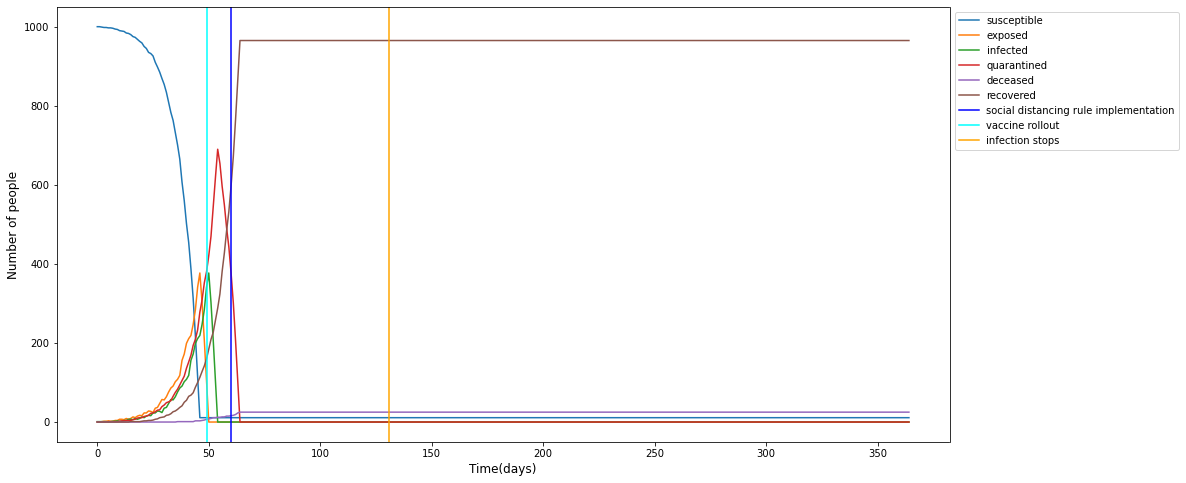

In [19]:
# Plot for  Pandemic Story
plt.rcParams["figure.figsize"] = 16,8
new_df = df
del new_df['trial']
del new_df['total']
new_df.groupby(df['days']).mean().plot()
# plt.yscale('log')
plt.xlabel("Time(days)", fontsize = 12)
plt.ylabel("Number of people", fontsize = 12)
plt.axvline(x = sd_start, color = 'blue', label = 'social distancing rule implementation')
plt.axvline(x = 49, color = 'aqua', label = 'vaccine rollout')
#plt.axvline(x = vaccine_rollout+60, color = 'pink', label = 'vaccine rollout dose 2')
plt.axvline(x = 131, color = 'orange', label = 'infection stops')
#plt.axvline(x = 40, color = 'grey', label = 'mutant virus outbreak')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

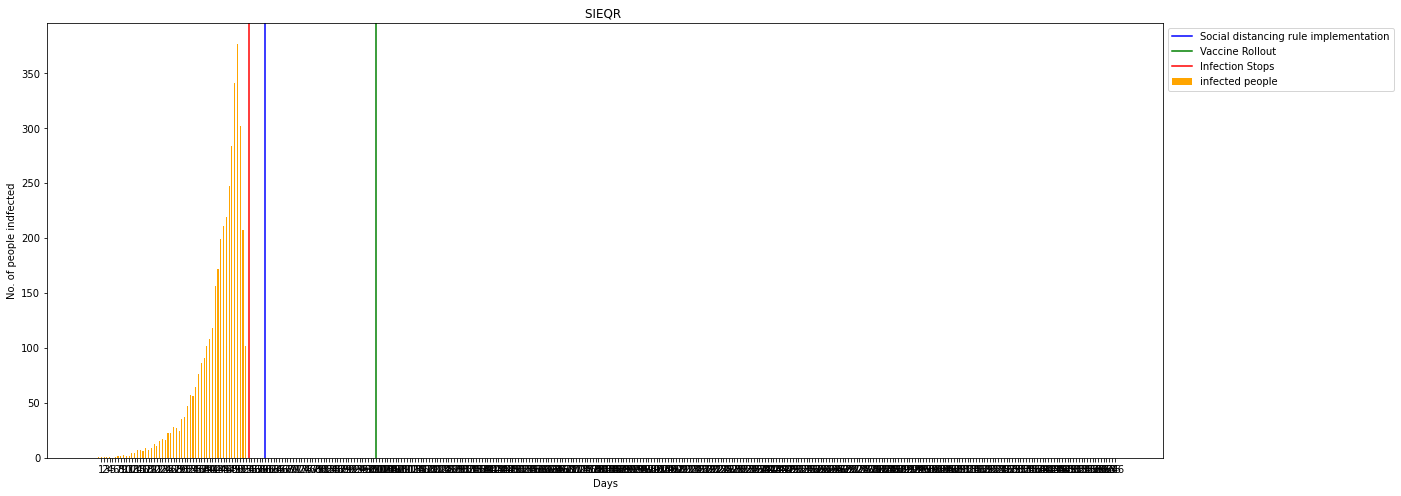

In [20]:
# creating the dataset
a =dict(zip(df['days'],df['infected']))
days = list(a.keys())
days.append(days[-1]+1)

values = list(a.values())
values.append(0)
plt.rcParams["figure.figsize"] = 20,8
x_ticks = np.arange(1, max(df['days'])+3, 1)
plt.xticks(x_ticks)
# creating the bar plot
plt.bar(days, values, color ='orange', width = 0.4, label='infected people')
plt.axvline(x = sd_start, color = 'blue', label = 'Social distancing rule implementation')
plt.axvline(x = vaccine_rollout, color = 'green', label = 'Vaccine Rollout')
plt.axvline(x = infection_stopdate, color = 'red', label = 'Infection Stops')

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.xlabel("Days")
plt.ylabel("No. of people indfected")
plt.title("SIEQR ")

plt.show()


# In[ ]:


In [21]:
infection_stopdate

54